In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [ ]:
#=========== gen_null_stat(df) ===========
# input: df
# output: df_stat, df_null
def gen_null_stat(df):
    null_df = df.isnull()
    temp_seri = null_df.sum()
    null_stat = pd.DataFrame({"col": list(temp_seri.keys()), "null_count": list(temp_seri.values)})

    null_stat["percent"] = (null_stat["null_count"]/(len(df)))*100
    return null_stat, null_df


#=========== filter_outliner(col) ===========
# input: df, col_name
# output: df
def filter_outliner(df, col_name):
    arr = df[col_name].values
    q3 = np.quantile(arr, 0.75)

    q1 = np.quantile(arr, 0.25)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df = df[df[col_name] <= upper_limit]
    df = df[df[col_name] >= lower_limit]
    return df

In [ ]:
df = pd.read_csv('C:/Users/Admin/Documents/AdventureWork.csv')
df

,PersonID,PersonType,AddressTypeName,AddressLine1,AddressLine2,City,StateProvinceCode,StateName,TerritoryName,CountryRegionCode,CountryName,OrderCount,TotalSpent
0,20675.0,IN,Home,"00, rue Saint-Lazare",NaN,Dunkerque,59,Nord,France,FR,France,1.0,634.7783
1,15161.0,IN,Home,"02, place de Fontenoy",NaN,Verrieres Le Buisson,91,Essonne,France,FR,France,1.0,622.9659
2,10577.0,IN,Home,"035, boulevard du Montparnasse",NaN,Verrieres Le Buisson,91,Essonne,France,FR,France,1.0,76.7533
3,6636.0,IN,Home,"081, boulevard du Montparnasse",NaN,Saint-Denis,93,Seine Saint Denis,France,FR,France,1.0,98.3119
4,4045.0,IN,Home,"081, boulevard du Montparnasse",NaN,Seattle,WA,Washington,Northwest,US,United States,1.0,2720.0128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,721.0,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3205.1588
19992,847.0,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,313985.4367
19993,1929.0,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,83314.8579
19994,NaN,GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           19143 non-null  float64
 1   PersonType         19996 non-null  object 
 2   AddressTypeName    18798 non-null  object 
 3   AddressLine1       18798 non-null  object 
 4   AddressLine2       322 non-null    object 
 5   City               18798 non-null  object 
 6   StateProvinceCode  18798 non-null  object 
 7   StateName          18798 non-null  object 
 8   TerritoryName      18798 non-null  object 
 9   CountryRegionCode  18798 non-null  object 
 10  CountryName        18798 non-null  object 
 11  OrderCount         19143 non-null  float64
 12  TotalSpent         19143 non-null  float64
dtypes: float64(3), object(10)
memory usage: 2.0+ MB


In [ ]:
print("Total categories in the feature PersonType:\n", df["PersonType"].value_counts(), "\n")
print("Total categories in the feature TerritoryName:\n", df["TerritoryName"].value_counts(), "\n")
print("Total categories in the feature AddressTypeName:\n", df["AddressTypeName"].value_counts(), "\n")
print("Total categories in the feature CountryName:\n", df["CountryName"].value_counts(), "\n")

Total categories in the feature PersonType:
 IN    18508
SC      753
GC      289
EM      273
VC      156
SP       17
Name: PersonType, dtype: int64 

Total categories in the feature TerritoryName:
 Southwest         4453
Northwest         3640
Australia         3592
United Kingdom    1914
France            1811
Germany           1781
Canada            1573
Southeast           13
Central             11
Northeast           10
Name: TerritoryName, dtype: int64 

Total categories in the feature AddressTypeName:
 Home        18774
Shipping       24
Name: AddressTypeName, dtype: int64 

Total categories in the feature CountryName:
 United States     8127
Australia         3592
United Kingdom    1914
France            1811
Germany           1781
Canada            1573
Name: CountryName, dtype: int64 



In [ ]:
columnToDrop = ['AddressTypeName', 'AddressLine1', 'AddressLine2', 'City', 'StateProvinceCode', 'StateName', 'CountryRegionCode', 'CountryName']

df = df.drop(columnToDrop, axis=1)
df

,PersonID,PersonType,TerritoryName,OrderCount,TotalSpent
0,20675.0,IN,France,1.0,634.7783
1,15161.0,IN,France,1.0,622.9659
2,10577.0,IN,France,1.0,76.7533
3,6636.0,IN,France,1.0,98.3119
4,4045.0,IN,Northwest,1.0,2720.0128
...,...,...,...,...,...
19991,721.0,SC,NaN,6.0,3205.1588
19992,847.0,SC,NaN,8.0,313985.4367
19993,1929.0,SC,NaN,4.0,83314.8579
19994,NaN,GC,NaN,NaN,NaN


In [ ]:
print("Total row: " + str(len(df)))
print("Total row after drop duplicated: " + str(len(df.drop_duplicates())))

Total row: 19996
Total row after drop duplicated: 19135


In [ ]:
df['PersonType'] = df['PersonType'].fillna('IN')
df['TerritoryName'] = df['TerritoryName'].fillna('United States')

In [ ]:
df.drop_duplicates()

,PersonID,PersonType,TerritoryName,OrderCount,TotalSpent
0,20675.0,IN,France,1.0,634.7783
1,15161.0,IN,France,1.0,622.9659
2,10577.0,IN,France,1.0,76.7533
3,6636.0,IN,France,1.0,98.3119
4,4045.0,IN,Northwest,1.0,2720.0128
...,...,...,...,...,...
19988,329.0,SC,United States,4.0,1291.8825
19990,1411.0,SC,United States,7.0,6276.6629
19991,721.0,SC,United States,6.0,3205.1588
19992,847.0,SC,United States,8.0,313985.4367


In [ ]:
df = df[df['PersonID'].notna()]
df

,PersonID,PersonType,TerritoryName,OrderCount,TotalSpent
0,20675.0,IN,France,1.0,634.7783
1,15161.0,IN,France,1.0,622.9659
2,10577.0,IN,France,1.0,76.7533
3,6636.0,IN,France,1.0,98.3119
4,4045.0,IN,Northwest,1.0,2720.0128
...,...,...,...,...,...
19988,329.0,SC,United States,4.0,1291.8825
19990,1411.0,SC,United States,7.0,6276.6629
19991,721.0,SC,United States,6.0,3205.1588
19992,847.0,SC,United States,8.0,313985.4367


In [ ]:
null_stat, null_df = gen_null_stat(df)
null_stat

,col,null_count,percent
0,PersonID,0,0.0
1,PersonType,0,0.0
2,TerritoryName,0,0.0
3,OrderCount,0,0.0
4,TotalSpent,0,0.0


In [ ]:
from sklearn import preprocessing as pre
enc = pre.LabelEncoder()
df['PersonType'] = enc.fit_transform(df['PersonType'])
df['TerritoryName'] = enc.fit_transform(df['TerritoryName'])

C:\Users\Admin\AppData\Local\Temp/ipykernel_1360/3229500661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PersonType'] = enc.fit_transform(df['PersonType'])
C:\Users\Admin\AppData\Local\Temp/ipykernel_1360/3229500661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TerritoryName'] = enc.fit_transform(df['TerritoryName'])


In [ ]:
df = df.drop('PersonID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19143 entries, 0 to 19993
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PersonType     19143 non-null  int32  
 1   TerritoryName  19143 non-null  int32  
 2   OrderCount     19143 non-null  float64
 3   TotalSpent     19143 non-null  float64
dtypes: float64(2), int32(2)
memory usage: 598.2 KB


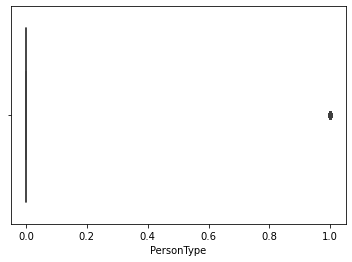

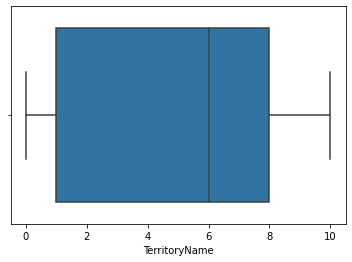

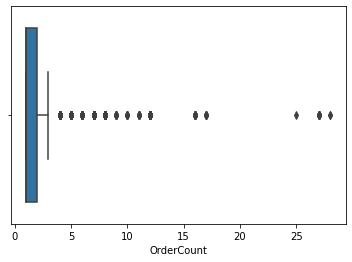

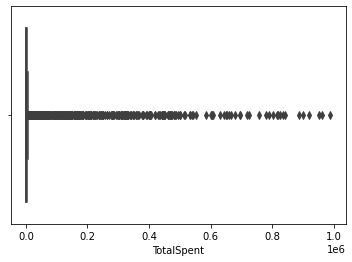

In [ ]:
for i, col in enumerate(df.describe().columns):
    plt.figure(i)
    sns.boxplot(x = df[col])

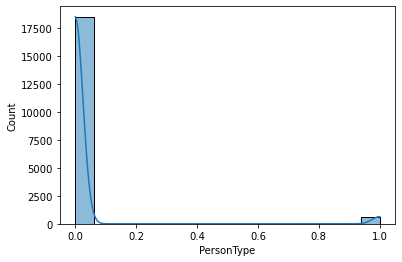

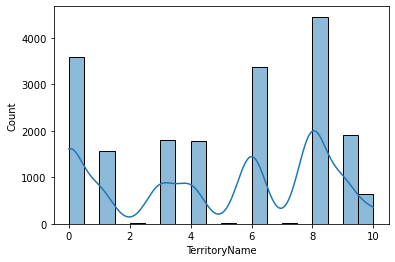

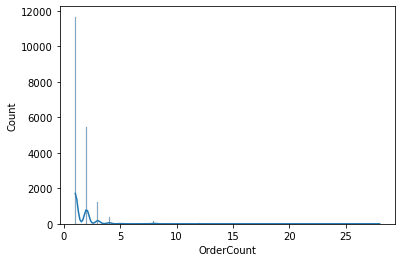

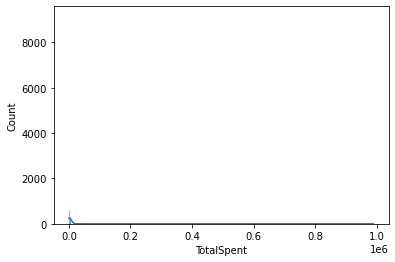

In [ ]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(data=df,x=col,kde=True)

<AxesSubplot:>

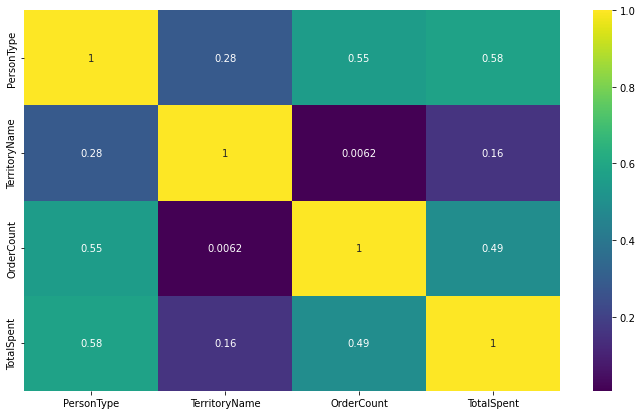

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Vì các features được phân hóa quá nhiều nên phải tùy chỉnh dữ liệu lại.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(df)
scaled_feature = scaler.transform(df)

df_scale = pd.DataFrame(scaled_feature, columns=df.columns)

df_scale

,PersonType,TerritoryName,OrderCount,TotalSpent
0,-0.185228,-0.565789,-0.443089,-0.132708
1,-0.185228,-0.565789,-0.443089,-0.132978
2,-0.185228,-0.565789,-0.443089,-0.145469
3,-0.185228,-0.565789,-0.443089,-0.144976
4,-0.185228,0.332047,-0.443089,-0.085021
...,...,...,...,...
19138,5.398746,1.529162,1.616996,-0.117681
19139,5.398746,1.529162,3.677082,-0.003686
19140,5.398746,1.529162,2.990387,-0.073927
19141,5.398746,1.529162,4.363777,7.033172


Vì bài toán có 4 features tổng cộng nên sử dụng thuật toán PCA để giảm số chiều xuống còn 3.

In [ ]:
from sklearn.decomposition import PCA
#Phân nén xuống còn 3 chiều nên số component sẽ là 3.
pca = PCA(n_components=3)
pca.fit(df_scale)
PCA_ds = pd.DataFrame(pca.transform(df_scale), columns=(["col1", "col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,19143.0,1.195744e-15,1.463871,-0.759718,-0.394924,-0.243749,-0.112094,19.904854
col2,19143.0,-1.194724e-18,1.001550,-1.956631,-1.018250,-0.214433,0.905727,7.862825
col3,19143.0,5.213867e-17,0.699923,-10.965073,-0.050967,0.044553,0.172905,11.980435


In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

Vẽ biểu đồ Scatter của 3 thuộc tính của PCA

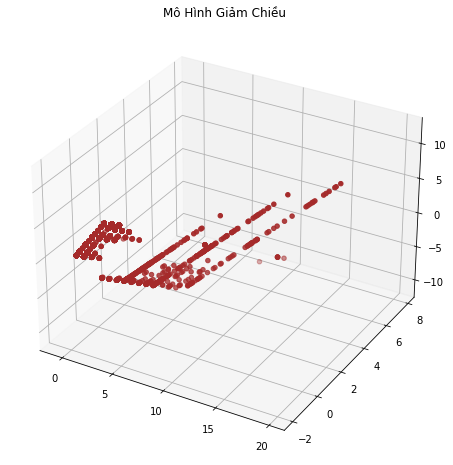

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="brown", marker="o" )
ax.set_title("Mô Hình Giảm Chiều")
plt.show()

Sử dụng thuật toán kmean để phân loại ra 4 loại cluster.

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(init="k-means++", n_clusters=4)
km.fit(df_scale)
label = km.fit_predict(df_scale)
print(label)

print(km.cluster_centers_)

[2 2 2 ... 3 1 3]
[[-1.85228205e-01  7.81640721e-01 -2.40842510e-01 -1.14045037e-01]
 [ 5.39874584e+00  1.52916203e+00  4.88545225e+00  1.06680098e+01]
 [-1.85228205e-01 -9.79976857e-01 -4.56232600e-04 -9.93036930e-02]
 [ 5.03749059e+00  1.35601188e+00  3.18205190e+00  1.11268482e+00]]


Thể hiện các cluster lên biểu đồ giảm chiều.

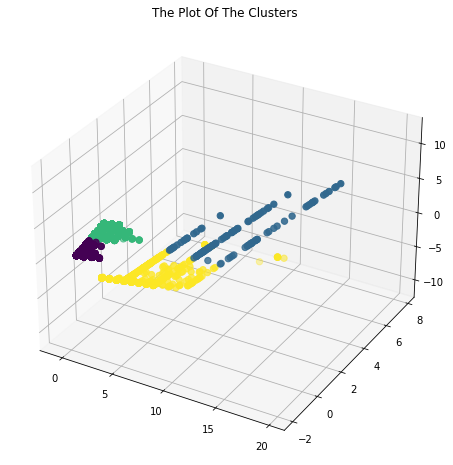

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=label , marker='o', cmap = "viridis")
ax.set_title("The Plot Of The Clusters")
plt.show()

Xem sự phân bố của các loại cluster.

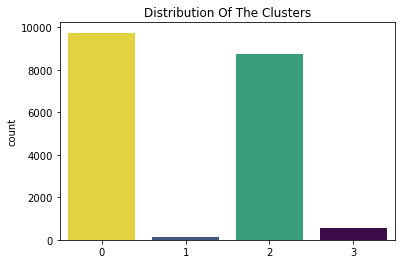

In [ ]:
pal = ["#FDE725FF", "#39568CFF", "#29AF7FFF","#440154FF"]
pl = sns.countplot(x=label, palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

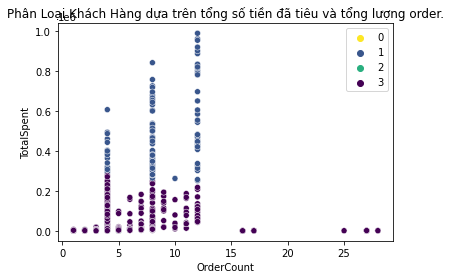

In [ ]:
# ta bắt đầu tìm hiểu sự tương quan giữa Phong cách và vùng lãnh thổ

pl = sns.scatterplot(data = df,x = df["OrderCount"], y = df["TotalSpent"], hue=label, palette=pal)
pl.set_title("Phân Loại Khách Hàng dựa trên tổng số tiền đã tiêu và tổng lượng order.")
ax.set_xlim(xmin=0.0, xmax=1000)
plt.legend()
plt.show()

Dựa vào biểu đồ phân biệt, ta có thể phân khách hàng thành 4 nhóm, gồm:

nhóm 1: Khách hàng có số lần mua đồ ít và số tiền tiêu mỗi lần mua lại ít.

nhóm 2: Khách hàng có số lần mua đồ nhiều nhưng tiêu tiền ít.

nhóm 3: Khách hàng có số lần mua đồ nhiều và số tiền tiêu mỗi lần mua lại nhiều.

nhóm 4: Khách hàng có số lần mua đồ ít nhưng số tiền tiêu mỗi lần mua lại nhiều.


Phân loại các nhóm khách hàng dựa trên vùng lãnh thổ.

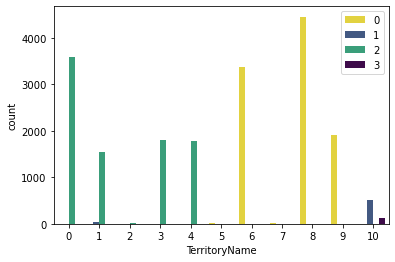

In [ ]:
pl = sns.countplot(data=df, x=df["TerritoryName"], hue=label, palette=pal)